# Visualizing Gradient Descent on a Loss Surface**

This Jupyter notebook demonstrates the process of performing gradient descent on a simple linear regression problem. The dataset consists of `years of experience (x)` and corresponding `salaries (y)`. The notebook provides a clear visualization of the loss function's surface in 3D, illustrating how gradient descent iteratively adjusts the model parameters (intercept and slope) to minimize the mean squared error (MSE).

The dataset used for in this notebook is the [Salary Dataset - Simple Linear Regression](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression) and which can be found on Kaggle.

## Import Libraries

If you haven't installed the libraries required for this notebook, uncomment the following line to install the libraries in your python environment.

In [16]:
#!pip install -r requirements.txt

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# For interactive plot
# %matplotlib tk  

## Dataset

### Read Dataset

Once you have downloaded the [dataset from Kaggle](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression), read it using pandas as shown below.

In [18]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [19]:
df.shape

(30, 3)

In [20]:
# Show dataset statistics
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


### Visualize Plot

Visualize the relationship between the years of experience and salary from the dataset.

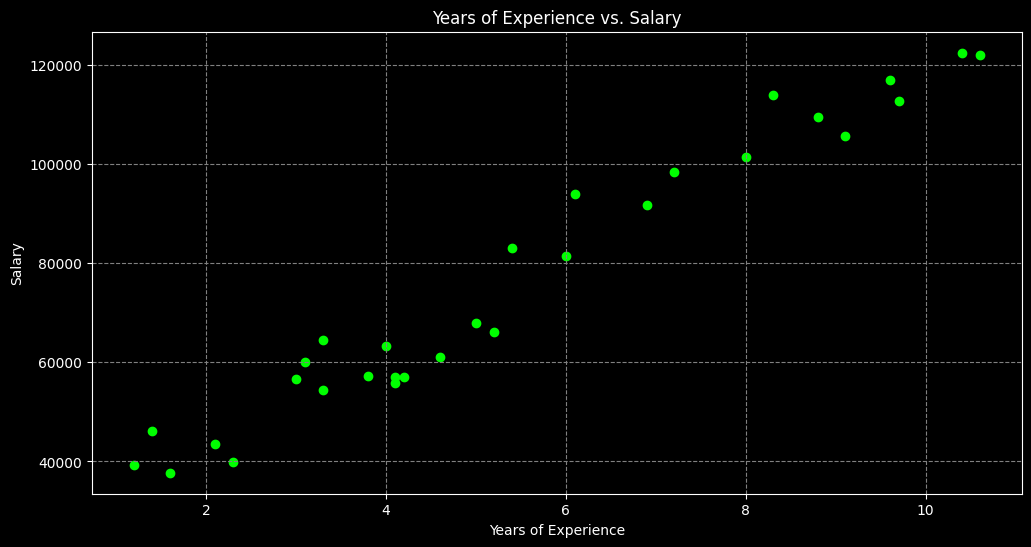

In [34]:
# Plot the scatter plot

# Enable dark mode
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
plt.scatter(df["YearsExperience"], df["Salary"], color="lime")
plt.title("Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True, color="gray", linestyle="--")
plt.show()


## Normalize the Features and Target

In this step, we normalize both the features (`YearsExperience`) and target variable (`Salary`) using `Min-Max scaling`. This ensures that the features and target values between 0 and 1, making it easier for Gradient Descent to converge.

In [22]:
# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Extract the original data
X = df["YearsExperience"].values.reshape(-1, 1)  # Reshape to 2D array for the scaler
y = df["Salary"].values.reshape(-1, 1)

# Fit and transform the data using the scaler
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Check the first few values to verify normalization
print("Normalized X (YearsExperience):", X[:5])
print("Normalized y (Salary):", y[:5])


Normalized X (YearsExperience): [[0.        ]
 [0.0212766 ]
 [0.04255319]
 [0.09574468]
 [0.11702128]]
Normalized y (Salary): [[0.01904087]
 [0.1000945 ]
 [0.        ]
 [0.06843846]
 [0.02551382]]


## Plot the Loss Surface

### Create a Grid for b0 and b1 Parameters
We define a range of values for `b0` (intercept) and `b1` (slope) to explore the loss surface.

In [23]:
# Create a grid of b0 (intercept) and b1 (slope)
b0_range = np.linspace(-1, 1, 50)
b1_range = np.linspace(-1, 1, 50)
b0_values, b1_values = np.meshgrid(b0_range, b1_range)

# Display the shape of the grid
print("Shape of b0_values:", b0_values.shape)
print("Shape of b1_values:", b1_values.shape)

Shape of b0_values: (50, 50)
Shape of b1_values: (50, 50)


### Calculate MSE for Each Combination of b0 and b1
Now, for each combination of b0 and b1, we calculate the Mean Squared Error (MSE) by comparing the predicted salary (y_pred) with the actual salary (y).

In [24]:
# Calculate MSE for each combination of b0 and b1
mse_values = np.zeros_like(b0_values)

for i in range(b0_values.shape[0]):
    for j in range(b0_values.shape[1]):
        y_pred = b0_values[i, j] + b1_values[i, j] * X  # Linear regression prediction
        mse_values[i, j] = np.mean((y - y_pred) ** 2)  # Calculate MSE for this combination of b0 and b1

# Check the shape of the MSE array
print("Shape of MSE array:", mse_values.shape)

Shape of MSE array: (50, 50)


### Plot the 3D Surface of the Loss Function
In this step, we plot the 3D surface of the loss function using the calculated MSE for each combination of b0 and b1.

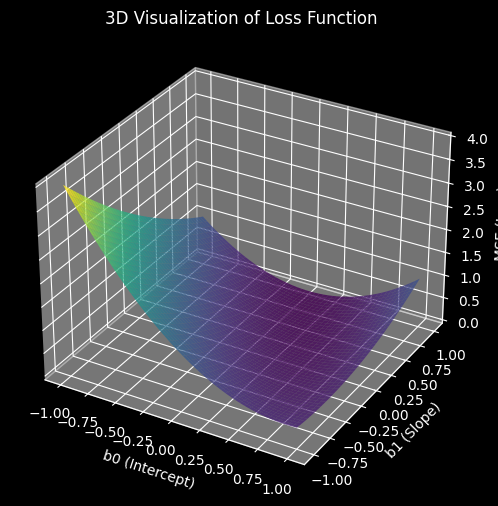

In [56]:
# Plot the 3D surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with the MSE values
ax.plot_surface(b0_values, b1_values, mse_values, cmap="viridis", alpha=0.8)

# Labels and title
ax.set_title("3D Visualization of Loss Function")
ax.set_xlabel("b0 (Intercept)")
ax.set_ylabel("b1 (Slope)")
ax.set_zlabel("MSE (Loss)")

# Show the plot
plt.show()


## Gradient Descent

### Initialize Gradient Descent Parameters
In this step, we define the learning rate, initial values for the parameters b0 (intercept) and b1 (slope), and the stopping threshold for the MSE. We also initialize the lists to store parameter values for plotting.

In [26]:
# Gradient Descent Parameters
learning_rate = 0.01
b0 = -0.9  # Initial intercept
b1 = -0.9  # Initial slope

# Display initial values
print(f"Initial b0: {b0}, Initial b1: {b1}")

Initial b0: -0.9, Initial b1: -0.9


### Perform Gradient Descent
We implement the gradient descent algorithm using a while loop that continues until the absolute diffence between subsequence MSE values is below a specified threshold. In each iteration, we calculate the gradients for b0 and b1, update the parameters, and record the MSE.

In [27]:
# Store parameter values for plotting
b0_history = []
b1_history = []
mse_history = []

# Perform Gradient Descent using a while loop
n = len(y)
iteration = 0  # Counter for iterations

threshold = 0  # Threshold for absolute difference between consecutive MSE
mse_val = float('inf')  # Initialize MSE with infinity
absolute_difference = float('inf')  # Initialize absolute difference with infinity

while absolute_difference > threshold:
    y_pred = b0 + b1 * X
    error = y - y_pred

    # Calculate gradients
    b0_grad = -(2/n) * np.sum(error)
    b1_grad = -(2/n) * np.sum(error * X)

    # Update parameters
    b0 -= learning_rate * b0_grad
    b1 -= learning_rate * b1_grad

    # Calculate MSE
    mse_prev = mse_val  # Store previous MSE
    mse_val = np.mean(error**2)

    # Calculate the absolute difference between the current and previous MSE
    absolute_difference = abs(mse_val - mse_prev)
    
    # Print MSE for each iteration
    print(f"Iteration {iteration + 1}: MSE = {mse_val}, Absolute Difference = {absolute_difference}")
    
    # Record parameter values and loss
    b0_history.append(b0)
    b1_history.append(b1)
    mse_history.append(mse_val)

    # Increment iteration counter
    iteration += 1

Iteration 1: MSE = 3.420813324429928, Absolute Difference = inf
Iteration 2: MSE = 3.262732452795038, Absolute Difference = 0.15808087163489004
Iteration 3: MSE = 3.1122329831849926, Absolute Difference = 0.15049946961004546
Iteration 4: MSE = 2.968950516320365, Absolute Difference = 0.14328246686462753
Iteration 5: MSE = 2.8325381700634344, Absolute Difference = 0.13641234625693066
Iteration 6: MSE = 2.702665737339918, Absolute Difference = 0.12987243272351634
Iteration 7: MSE = 2.57901888454085, Absolute Difference = 0.12364685279906817
Iteration 8: MSE = 2.461298388458624, Absolute Difference = 0.11772049608222579
Iteration 9: MSE = 2.349219409904818, Absolute Difference = 0.11207897855380633
Iteration 10: MSE = 2.242510802246443, Absolute Difference = 0.10670860765837498
Iteration 11: MSE = 2.1409144531820203, Absolute Difference = 0.1015963490644225
Iteration 12: MSE = 2.0441846581595993, Absolute Difference = 0.09672979502242107
Iteration 13: MSE = 1.952087523915632, Absolute Dif

#### Final Optimized Parameters

In [28]:
# Final Parameters
print("Final Parameters:\n")
print(f"b0 (Intercept): {b0}")
print(f"b1 (Slope): {b1}")
print(f"Final MSE: {mse_history[-1]}")
print(f"Total iterations: {iteration}")

Final Parameters:

b0 (Intercept): -0.01823572328933239
b1 (Slope): 1.0492515432593261
Final MSE: 0.004362993548420029
Total iterations: 11139


### Gradient Descent Path on Loss Surface

This plot demonstrates the Gradient Descent optimization process on the MSE loss surface. It shows the surface created from different combinations of intercept (`b0`) and slope (`b1`), with the descent path visualized as it converges toward the optimal solution.


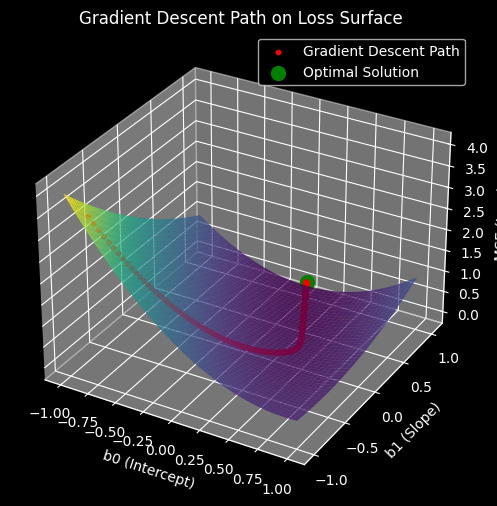

In [29]:
# Create the figure
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(b0_values, b1_values, mse_values, cmap="viridis", alpha=0.8)

# Plot the Gradient Descent path
ax.scatter(b0_history, b1_history, mse_history, color="red", s=10, label="Gradient Descent Path", zorder=5)

# Add a larger green dot for the optimal solution (last point in the gradient descent path)
ax.scatter(b0_history[-1], b1_history[-1], mse_history[-1], color="green", s=100, label="Optimal Solution")

# Set labels and title
ax.set_title("Gradient Descent Path on Loss Surface")
ax.set_xlabel("b0 (Intercept)")
ax.set_ylabel("b1 (Slope)")
ax.set_zlabel("MSE (Loss)")

# Add the legend
ax.legend()

# Show the plot
plt.show()

## Plot the Original Data and the Regression Line

Finally, we plot the original data points (Years of Experience vs. Salary) along with the regression line. The regression line is calculated using the final b0 and b1 parameters obtained from gradient descent on the scaled data. To correctly display the regression line on the original scale of the data, we `inverse-transform` the predicted values back to their original scale. This ensures that the plot reflects the true relationship between the original variables.

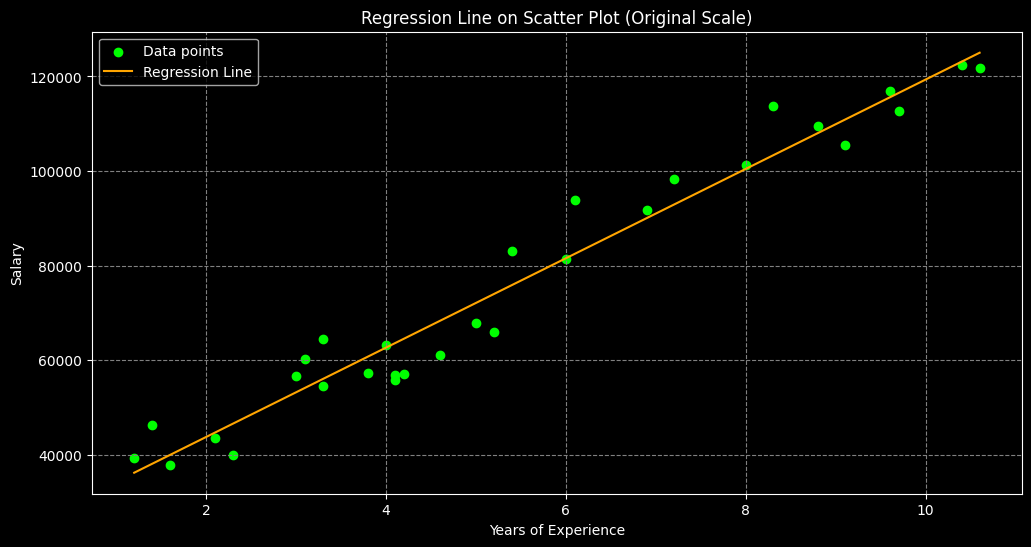

In [40]:
# Create the scatter plot of the original data points
plt.figure(figsize=(12, 6))
plt.scatter(df["YearsExperience"], df["Salary"], label="Data points", color="lime")

# Create the regression line using the final b0 and b1 on the scaled data
y_pred_scaled = b0 + b1 * X  # Predicted values based on the scaled parameters

# Inverse transform the predicted values to the original scale
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Plot the regression line on the original scale
plt.plot(df["YearsExperience"], y_pred_original, color="orange", label="Regression Line")

# Labels and title
plt.title("Regression Line on Scatter Plot (Original Scale)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True, color="gray", linestyle="--")
plt.show()


Thank you for reading!

`Brian Hulela`